In [1]:
# Mounting Google Drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
# Setting the current working directory
import os
os.chdir('/content/drive/My Drive/')

In [3]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All"
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [4]:
# Importing all the necessary libraries
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

sns.set_style('darkgrid')
matplotlib.rcParams['font.size']=14
matplotlib.rcParams['figure.figsize']=(9,5)
matplotlib.rcParams['figure.facecolor']='#00000000'

In [5]:
#reading the data as a panda dataframe
df=pd.read_csv('dummy_data.csv')
df

,age,gender,time_spent,platform,interests,location,demographics,profession,income,indebt,isHomeOwner,Owns_Car
0,56,male,3,Instagram,Sports,United Kingdom,Urban,Software Engineer,19774,True,False,False
1,46,female,2,Facebook,Travel,United Kingdom,Urban,Student,10564,True,True,True
2,32,male,8,Instagram,Sports,Australia,Sub_Urban,Marketer Manager,13258,False,False,False
3,60,non-binary,5,Instagram,Travel,United Kingdom,Urban,Student,12500,False,True,False
4,25,male,1,Instagram,Lifestlye,Australia,Urban,Software Engineer,14566,False,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...
995,22,female,8,Instagram,Lifestlye,United Kingdom,Rural,Marketer Manager,18536,False,True,False
996,40,non-binary,6,YouTube,Travel,United Kingdom,Rural,Software Engineer,12711,True,False,False
997,27,non-binary,5,YouTube,Travel,United Kingdom,Rural,Student,17595,True,False,True
998,61,female,4,YouTube,Sports,Australia,Sub_Urban,Marketer Manager,16273,True,True,False


In [6]:
df.time_spent.value_counts()

time_spent
5    125
4    120
2    112
9    111
6    110
8    109
3    107
7    107
1     99
Name: count, dtype: int64

## Data Pre-Processing

In [7]:
# checking the head of the dataframe

df.head()

,age,gender,time_spent,platform,interests,location,demographics,profession,income,indebt,isHomeOwner,Owns_Car
0,56,male,3,Instagram,Sports,United Kingdom,Urban,Software Engineer,19774,True,False,False
1,46,female,2,Facebook,Travel,United Kingdom,Urban,Student,10564,True,True,True
2,32,male,8,Instagram,Sports,Australia,Sub_Urban,Marketer Manager,13258,False,False,False
3,60,non-binary,5,Instagram,Travel,United Kingdom,Urban,Student,12500,False,True,False
4,25,male,1,Instagram,Lifestlye,Australia,Urban,Software Engineer,14566,False,True,True


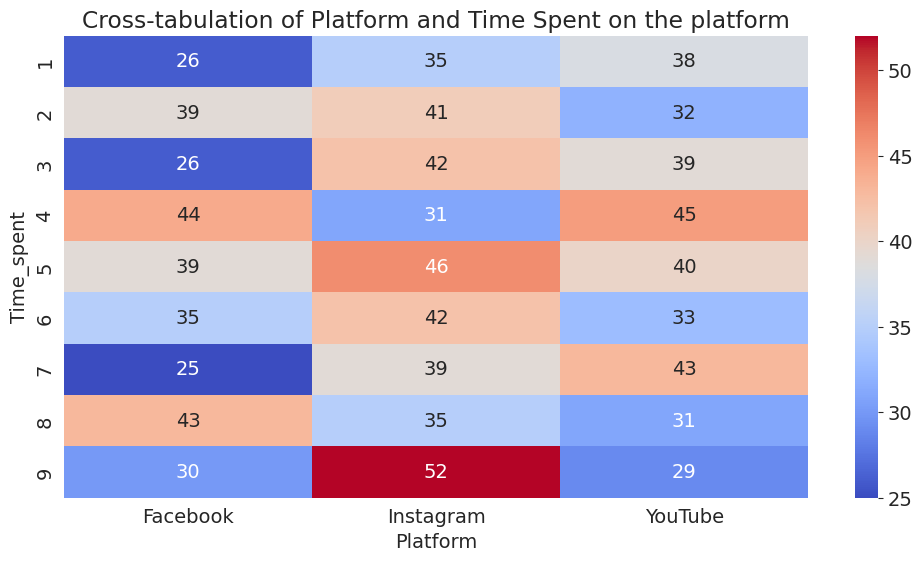

In [8]:
# Cross-tabulation and heatmap
cross_tab = pd.crosstab(df['time_spent'], df['platform'])
plt.figure(figsize=(12, 6))
sns.heatmap(cross_tab, annot=True, fmt='d', cmap='coolwarm')
plt.title('Cross-tabulation of Platform and Time Spent on the platform')
plt.xlabel('Platform')
plt.ylabel('Time_spent')
plt.show()

In [9]:
#sample of the data
df.sample(10)

,age,gender,time_spent,platform,interests,location,demographics,profession,income,indebt,isHomeOwner,Owns_Car
364,40,male,6,Facebook,Lifestlye,United Kingdom,Urban,Software Engineer,14920,True,True,True
426,47,female,8,YouTube,Lifestlye,United States,Rural,Student,19493,False,True,False
228,39,female,7,Instagram,Travel,United States,Rural,Student,15362,False,False,True
677,33,female,4,Facebook,Sports,United States,Sub_Urban,Student,17964,False,False,True
884,24,male,7,YouTube,Travel,Australia,Urban,Marketer Manager,10224,True,False,True
182,58,female,6,YouTube,Sports,Australia,Sub_Urban,Software Engineer,12208,False,False,True
624,42,male,6,Instagram,Travel,United Kingdom,Rural,Software Engineer,16944,False,True,False
4,25,male,1,Instagram,Lifestlye,Australia,Urban,Software Engineer,14566,False,True,True
980,29,male,7,YouTube,Sports,United Kingdom,Urban,Student,19952,True,True,True
557,47,non-binary,7,Instagram,Sports,Australia,Rural,Student,14868,True,False,False


In [10]:
#displaying the columns of the datasets
df.columns

Index(['age', 'gender', 'time_spent', 'platform', 'interests', 'location',
       'demographics', 'profession', 'income', 'indebt', 'isHomeOwner',
       'Owns_Car'],
      dtype='object')

In [11]:
#null check-Replace all values in the DataFrame with True for NULL values, otherwise False:
df.isnull().sum()

age             0
gender          0
time_spent      0
platform        0
interests       0
location        0
demographics    0
profession      0
income          0
indebt          0
isHomeOwner     0
Owns_Car        0
dtype: int64

In [12]:
#Series with a number of distinct observations
df.nunique()

age              47
gender            3
time_spent        9
platform          3
interests         3
location          3
demographics      3
profession        3
income          955
indebt            2
isHomeOwner       2
Owns_Car          2
dtype: int64

In [13]:
# shape of the dataframe

df.shape

(1000, 12)

In [14]:
#information about the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   age           1000 non-null   int64 
 1   gender        1000 non-null   object
 2   time_spent    1000 non-null   int64 
 3   platform      1000 non-null   object
 4   interests     1000 non-null   object
 5   location      1000 non-null   object
 6   demographics  1000 non-null   object
 7   profession    1000 non-null   object
 8   income        1000 non-null   int64 
 9   indebt        1000 non-null   bool  
 10  isHomeOwner   1000 non-null   bool  
 11  Owns_Car      1000 non-null   bool  
dtypes: bool(3), int64(3), object(6)
memory usage: 73.4+ KB


In [15]:
# null value check
df.isna().apply(pd.value_counts).transpose()

<ipython-input-15-ce5b012edf9f>:2: FutureWarning: pandas.value_counts is deprecated and will be removed in a future version. Use pd.Series(obj).value_counts() instead.
  df.isna().apply(pd.value_counts).transpose()


,False
age,1000
gender,1000
time_spent,1000
platform,1000
interests,1000
location,1000
demographics,1000
profession,1000
income,1000
indebt,1000


In [16]:
#Count the frequency of unique values
df.gender.value_counts()

gender
male          337
non-binary    332
female        331
Name: count, dtype: int64

In [17]:
#Count the frequency of unique values
df.platform.value_counts()

platform
Instagram    363
YouTube      330
Facebook     307
Name: count, dtype: int64

In [18]:
#Count the frequency of unique values
df.location.value_counts()

location
Australia         352
United Kingdom    329
United States     319
Name: count, dtype: int64

In [19]:
#Count the frequency of unique values

df.demographics.value_counts()

demographics
Rural        340
Sub_Urban    335
Urban        325
Name: count, dtype: int64

In [20]:
#Count the frequency of unique values
df.profession.value_counts()

profession
Marketer Manager     355
Software Engineer    336
Student              309
Name: count, dtype: int64

In [21]:
#description of the data in the DataFrame
df.describe().style.background_gradient(cmap='RdGy_r')

,age,time_spent,income
count,1000.000000,1000.000000,1000.000000
mean,40.986000,5.029000,15014.823000
std,13.497852,2.537834,2958.628221
min,18.000000,1.000000,10012.000000
25%,29.000000,3.000000,12402.250000
50%,42.000000,5.000000,14904.500000
75%,52.000000,7.000000,17674.250000
max,64.000000,9.000000,19980.000000


In [22]:
#checking the minimum age
df.age.min()

18

In [23]:
#defining the age
def myfunc(age):
    if age<2:
        return 'baby'
    elif age>2 and age<=10:
        return 'children'
    elif age>10 and age<=16:
        return 'teenage'
    elif age>16 and age<=30:
        return 'Young Adults'
    elif age>30 and age <=50:
        return 'middel aged Adults'
    elif age>50 and age<=70:
        return 'aged'
    else:
        return 'old'

In [24]:
#Age Category
df['Age Category']=df['age'].apply(myfunc)
df.sample(5)

,age,gender,time_spent,platform,interests,location,demographics,profession,income,indebt,isHomeOwner,Owns_Car,Age Category
117,51,non-binary,2,YouTube,Sports,United States,Urban,Marketer Manager,16058,True,True,False,aged
382,30,female,4,Instagram,Travel,United States,Urban,Marketer Manager,14264,True,False,True,Young Adults
636,36,male,3,YouTube,Travel,United States,Sub_Urban,Software Engineer,19033,True,True,False,middel aged Adults
826,33,male,8,Facebook,Sports,United Kingdom,Urban,Marketer Manager,14581,True,True,True,middel aged Adults
405,23,non-binary,3,Instagram,Travel,United Kingdom,Urban,Student,19903,False,True,False,Young Adults


In [25]:
#sample of the data
df.sample()

,age,gender,time_spent,platform,interests,location,demographics,profession,income,indebt,isHomeOwner,Owns_Car,Age Category
204,34,non-binary,4,Facebook,Lifestlye,United States,Urban,Student,12642,True,True,False,middel aged Adults


## Exploratory Data Analysis

### Average time spent on Social Media

In [26]:
#Calculating the age grouping on the platform
avg_time_on_sm=df.groupby(by=['platform']).agg({'time_spent':'mean'}).reset_index()
avg_time_on_sm

,platform,time_spent
0,Facebook,5.055375
1,Instagram,5.151515
2,YouTube,4.869697


average time spent by gender(grouping by gender) on platform


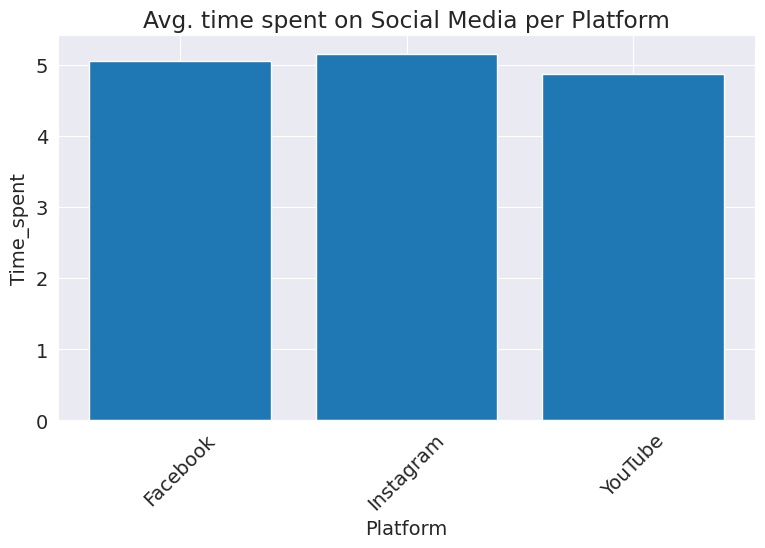

In [27]:
#bar plot using pandas plot bar
plt.figure(figsize=(9,5))
plt.bar(avg_time_on_sm['platform'],avg_time_on_sm['time_spent'])
plt.xlabel('Platform')
plt.ylabel('Time_spent')
plt.title('Avg. time spent on Social Media per Platform')
plt.xticks(rotation=45)
plt.show()


## Time spent on S.M Gender Wise

In [28]:
#aggregation of time spent grouping on gender
gender_wise=df.groupby(by=['gender']).agg({'time_spent':'mean'}).reset_index()
gender_wise

,gender,time_spent
0,female,5.190332
1,male,4.821958
2,non-binary,5.078313


average time spent by gender(grouping by gender)


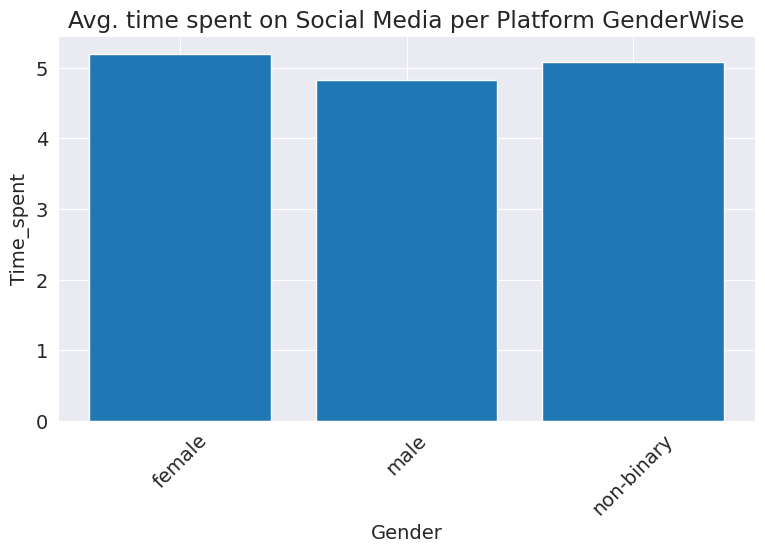

In [29]:
#bar plot using pandas plot bar
plt.figure(figsize=(9,5))
plt.bar(gender_wise['gender'],gender_wise['time_spent'])
plt.xlabel('Gender')
plt.ylabel('Time_spent')
plt.title('Avg. time spent on Social Media per Platform GenderWise')
plt.xticks(rotation=45)
plt.show()

## Time spent on S.M Location Wise

In [30]:
#Aggregation of the time spent grouping by location
location_wise=df.groupby(by=['location']).agg({'time_spent':'mean'}).reset_index()
location_wise

,location,time_spent
0,Australia,5.218750
1,United Kingdom,4.908815
2,United States,4.943574


average time spent by location(grouping by gender)
grouping wise -means average (aggreation across the time spent)

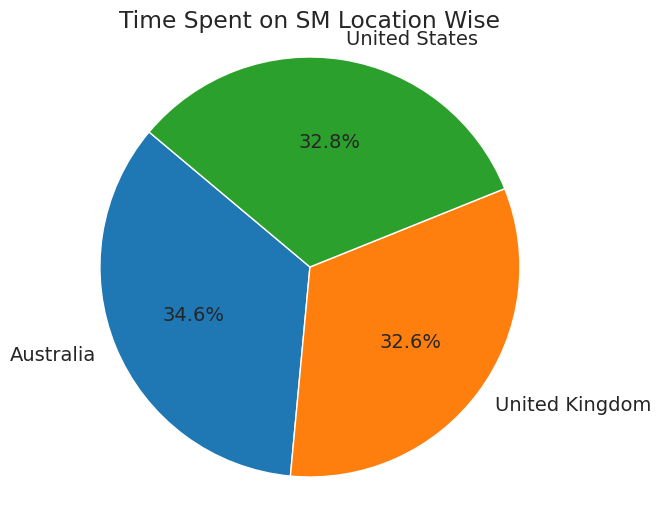

In [31]:
#pie chart for the location
labels=['Australia','United Kingdom','United States']
sizes=[5.218750,4.908815,4.943574]
plt.figure(figsize=(7, 6))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140)
plt.title('Time Spent on SM Location Wise')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle
plt.show()


## Time spent on SM demographics wise

In [32]:
#aggregation on the time spent by demographics
demographics_wise=df.groupby(by=['demographics']).agg({'time_spent':'mean'}).reset_index()
demographics_wise

,demographics,time_spent
0,Rural,5.020588
1,Sub_Urban,5.271642
2,Urban,4.787692


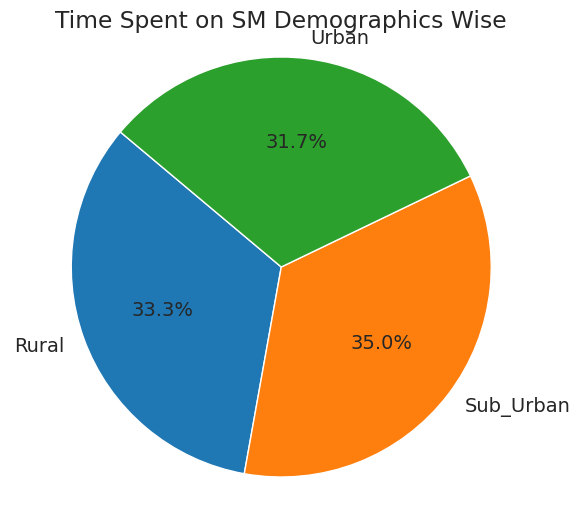

In [33]:
#pie chart for the Demographics
labels=['Rural','Sub_Urban','Urban']
sizes=[5.020588,5.271642,4.787692]
plt.figure(figsize=(7, 6))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140)
plt.title('Time Spent on SM Demographics Wise')
plt.axis('equal')
plt.show()

## Time spent on SM Profession Wise

In [34]:
#aggregation of the time spent grouping on the profession
profession_wise=df.groupby(by=['profession']).agg({'time_spent':'mean'}).reset_index()
profession_wise

,profession,time_spent
0,Marketer Manager,5.095775
1,Software Engineer,4.949405
2,Student,5.038835


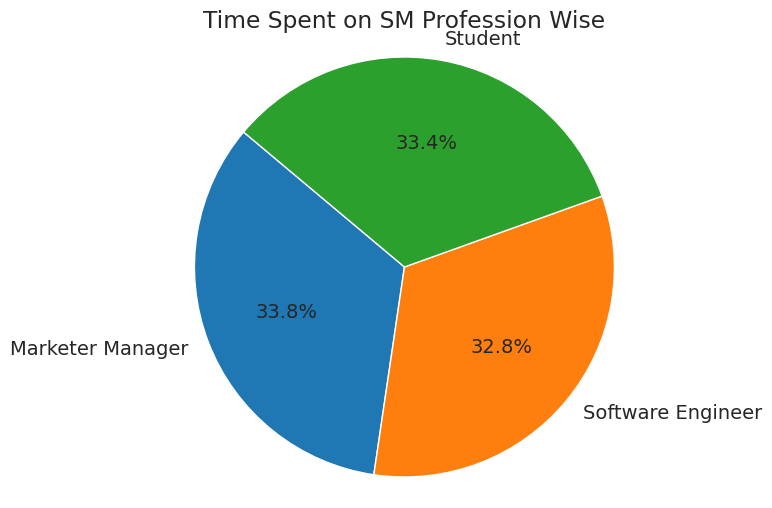

In [35]:
#Pie chart for the profession
labels=['Marketer Manager','Software Engineer','Student']
sizes=[5.095775,4.949405,5.038835]
plt.figure(figsize=(7, 6))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140)
plt.title('Time Spent on SM Profession Wise')
plt.axis('equal')
plt.show()

## Avg. time spent on SM's Different Platforms by Diff. Professionals

In [36]:
#Average Time spent grouping on the profession
professionals_avg_time=df.groupby(by=['profession','platform']).agg({'time_spent':'mean'}).reset_index()
professionals_avg_time

,profession,platform,time_spent
0,Marketer Manager,Facebook,5.281818
1,Marketer Manager,Instagram,5.031250
2,Marketer Manager,YouTube,4.991453
3,Software Engineer,Facebook,4.797872
4,Software Engineer,Instagram,5.265625
5,Software Engineer,YouTube,4.719298
6,Student,Facebook,5.048544
7,Student,Instagram,5.158879
8,Student,YouTube,4.898990


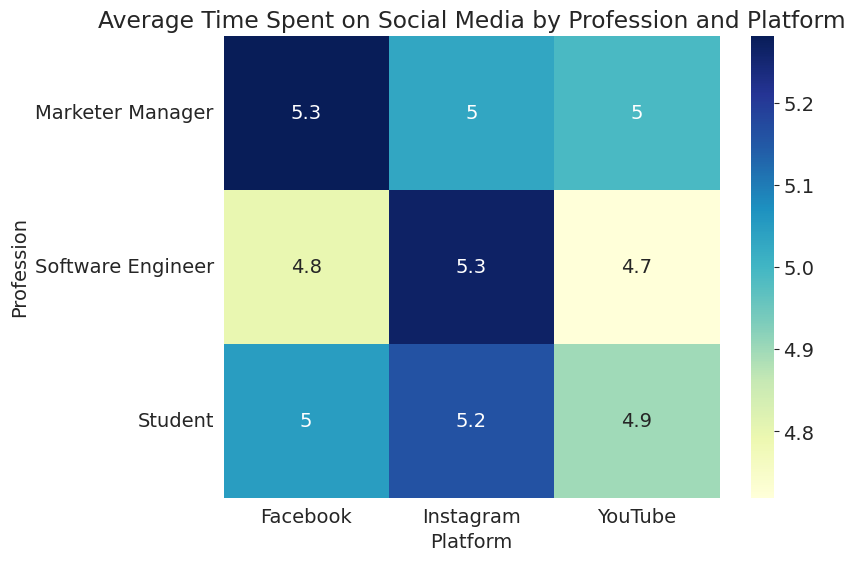

In [37]:
#Heatmap
plt.figure(figsize=(8, 6))
heatmap = sns.heatmap(professionals_avg_time.pivot(index='profession', columns='platform', values='time_spent'), annot=True, cmap='YlGnBu')
plt.title('Average Time Spent on Social Media by Profession and Platform')
plt.xlabel('Platform')
plt.ylabel('Profession')
plt.show()

## Avg. Time spent on diff. S.M. Platforms at diff. Locations

In [38]:
#aggregation of the time spent grouping on the location and platform
diff_loc=df.groupby(by=['location','platform']).agg({'time_spent':'mean'}).reset_index()
diff_loc

,location,platform,time_spent
0,Australia,Facebook,5.462264
1,Australia,Instagram,5.120000
2,Australia,YouTube,5.107438
3,United Kingdom,Facebook,4.700935
4,United Kingdom,Instagram,5.333333
5,United Kingdom,YouTube,4.647619
6,United States,Facebook,5.000000
7,United States,Instagram,5.008264
8,United States,YouTube,4.817308


Heatmaps visualize the data in 2-D colored maps making use of color variations like hue, saturation, or luminance. Heatmaps describe relationships between variables in form of colors instead of numbers.

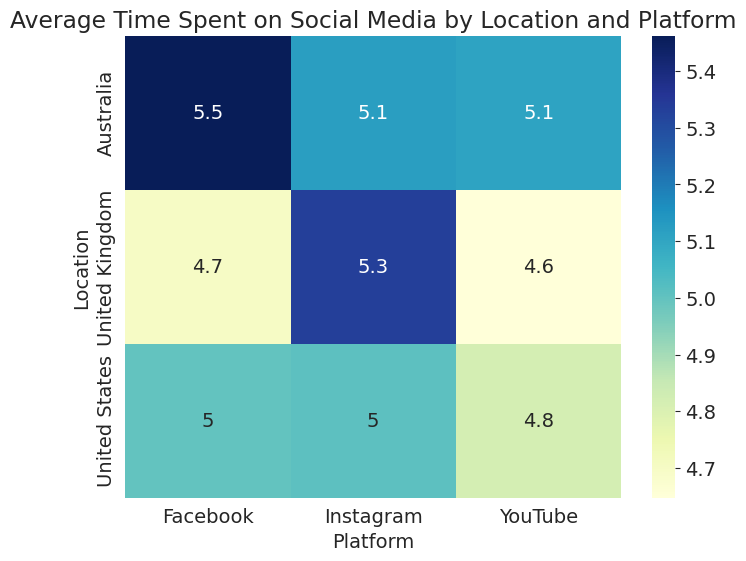

In [39]:
#Heatmap
plt.figure(figsize=(8, 6))
heatmap = sns.heatmap(diff_loc.pivot(index='location', columns='platform', values='time_spent'), annot=True, cmap='YlGnBu')
plt.title('Average Time Spent on Social Media by Location and Platform')
plt.xlabel('Platform')
plt.ylabel('Location')
plt.show()

In [40]:
def plot_corr(df, size=11):
    # Filter out only numeric columns
    numeric_columns = df.select_dtypes(include=['number'])

    # Compute the correlation matrix
    corr = numeric_columns.corr()

    # Plot the correlation matrix
    fig, ax = plt.subplots(figsize=(size, size))
    cax = ax.matshow(corr, cmap='coolwarm')
    plt.xticks(range(len(corr.columns)), corr.columns, rotation=90)
    plt.yticks(range(len(corr.columns)), corr.columns)
    plt.colorbar(cax)
    for i in range(len(corr.columns)):
        for j in range(len(corr.columns)):
            text = "%.2f" % corr.iloc[i, j]
            ax.text(j, i, text, ha='center', va='center', color='black')
    plt.show()

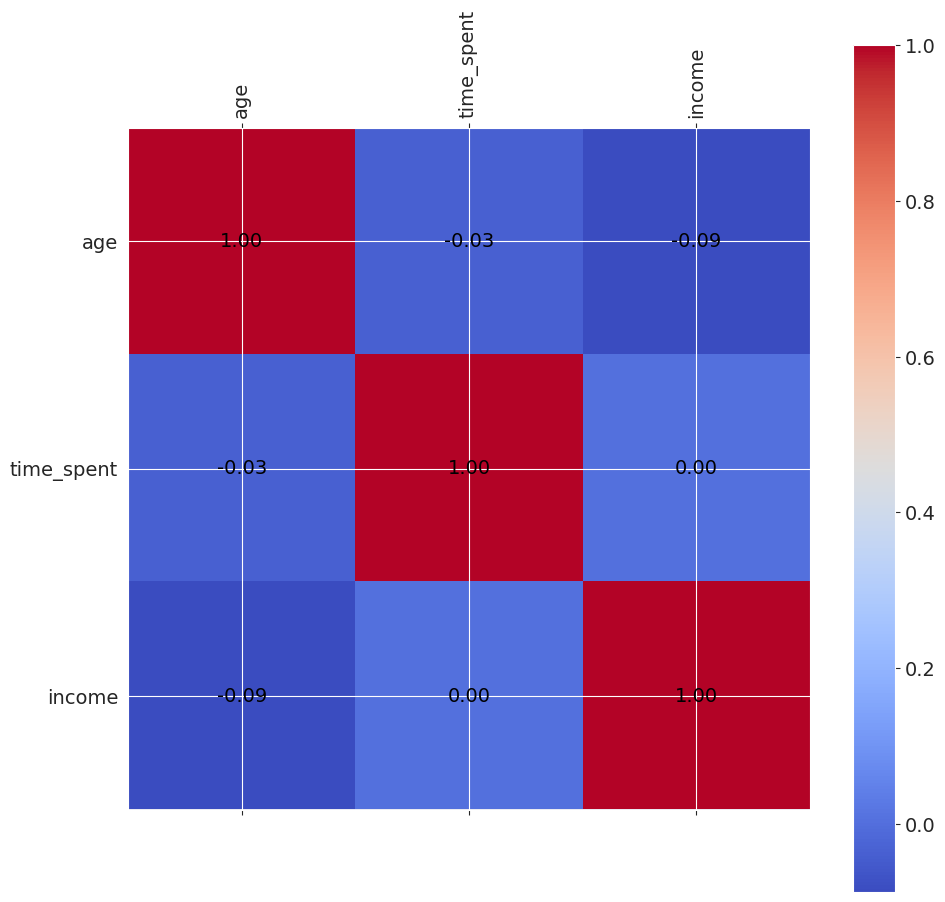

In [41]:
plot_corr(df)

## Avg. Time spent on SM by Age Category and Gender

In [42]:
#Average Time spent grouping on the age category and gender
age_gender=df.groupby(by=['Age Category','gender']).agg({'time_spent':'mean'}).reset_index()
age_gender

,Age Category,gender,time_spent
0,Young Adults,female,5.455556
1,Young Adults,male,4.883721
2,Young Adults,non-binary,4.938144
3,aged,female,5.160000
4,aged,male,4.387097
5,aged,non-binary,5.010417
6,middel aged Adults,female,5.042553
7,middel aged Adults,male,5.044304
8,middel aged Adults,non-binary,5.223022


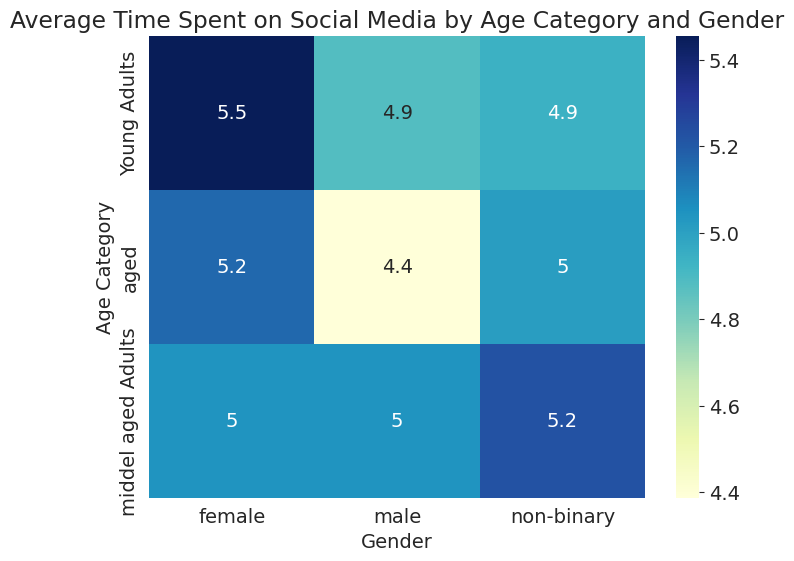

In [43]:
#HeatMap
plt.figure(figsize=(8, 6))
heatmap = sns.heatmap(age_gender.pivot(index='Age Category', columns='gender', values='time_spent'), annot=True, cmap='YlGnBu')
plt.title('Average Time Spent on Social Media by Age Category and Gender')
plt.xlabel('Gender')
plt.ylabel('Age Category')
plt.show()



```
# This is formatted as code
```

## Time Spent on Social Media on different age groups

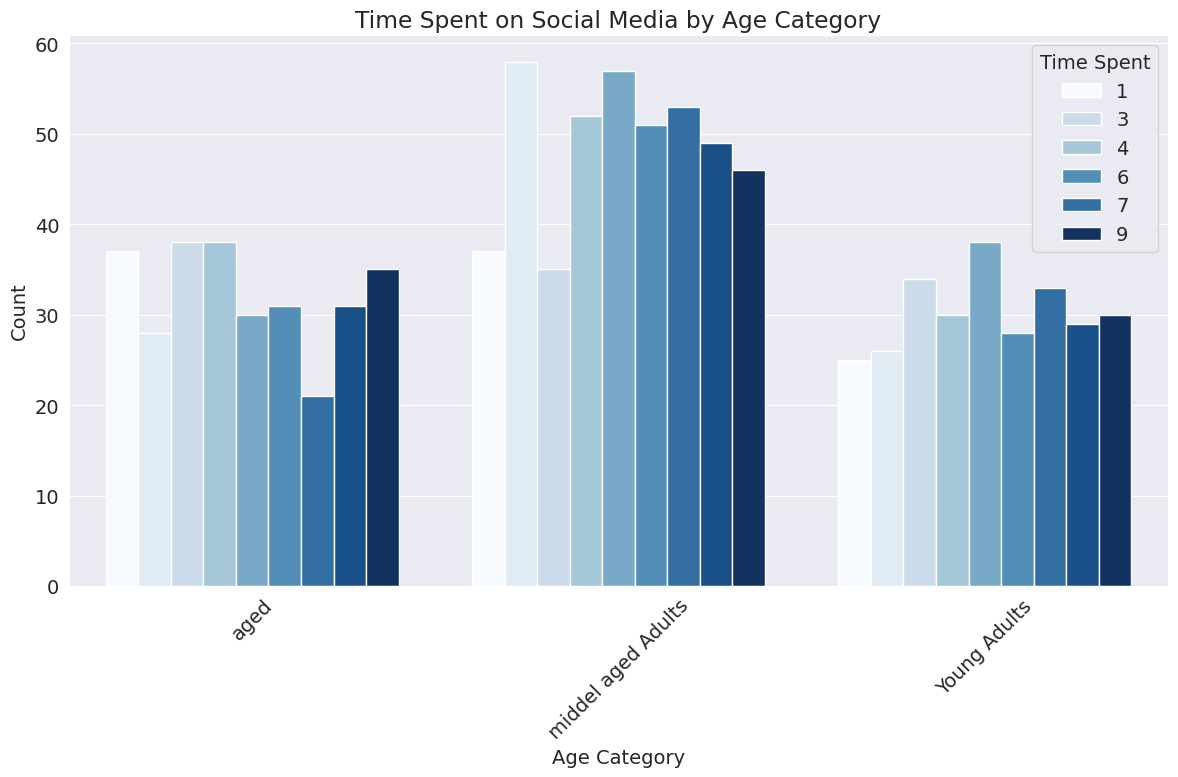

In [48]:
# Define the mapping for the time_spent values
time_spent_mapping = {
    'Low': '0-1 hours',
    'Medium': '1-2 hours',
    'High': '2+ hours'
}

# Apply the mapping
df['time_spent_label'] = df['time_spent'].map(time_spent_mapping)

# Plotting
plt.figure(figsize=(12, 8))
sns.countplot(data=df, x='Age Category', hue='time_spent',
              hue_order=['0-1 hours', '1-2 hours', '2+ hours'],
              palette='Blues')

plt.xlabel('Age Category')
plt.ylabel('Count')
plt.title('Time Spent on Social Media by Age Category')
plt.legend(title='Time Spent')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

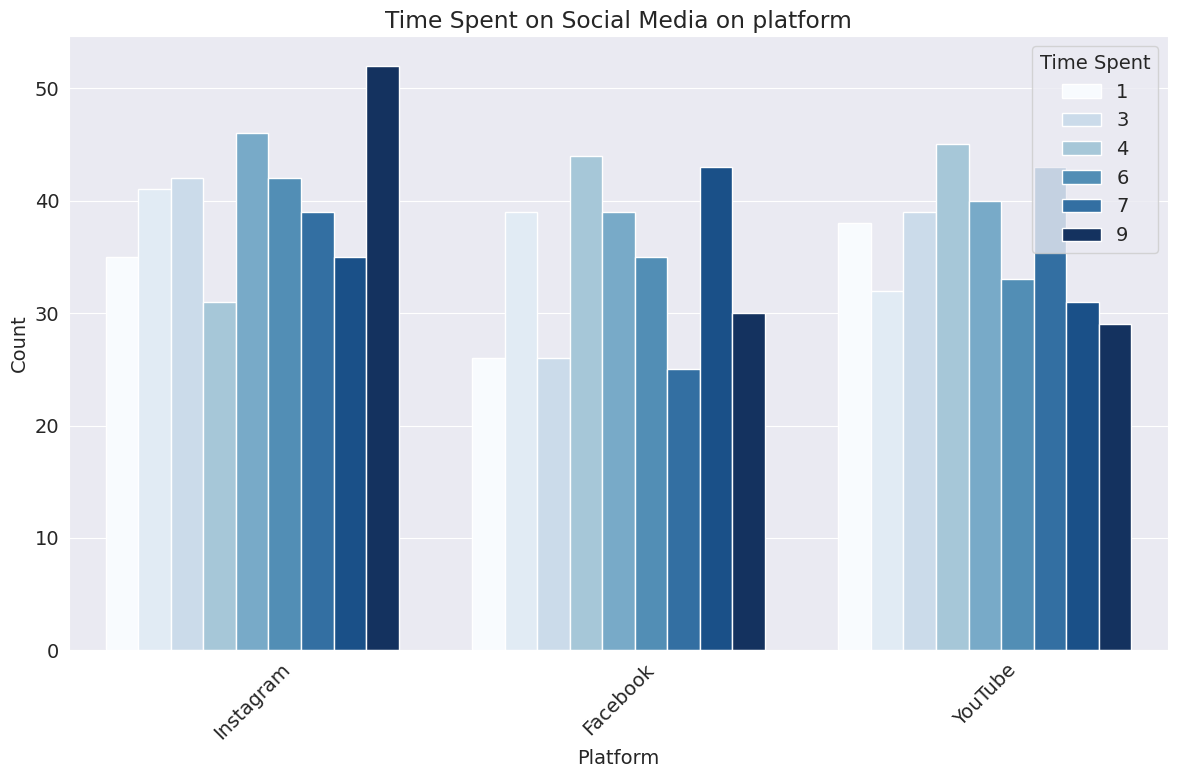

In [50]:

# Define the mapping for the time_spent values
time_spent_mapping = {
    'Low': '0-1 hours',
    'Medium': '1-2 hours',
    'High': '2+ hours'
}

# Apply the mapping
df['time_spent_label'] = df['time_spent'].map(time_spent_mapping)

# Plotting
plt.figure(figsize=(12, 8))
sns.countplot(data=df, x='platform', hue='time_spent',
              hue_order=['0-1 hours', '1-2 hours', '2+ hours'],
              palette='Blues')

plt.xlabel('Platform')
plt.ylabel('Count')
plt.title('Time Spent on Social Media on platform')
plt.legend(title='Time Spent')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

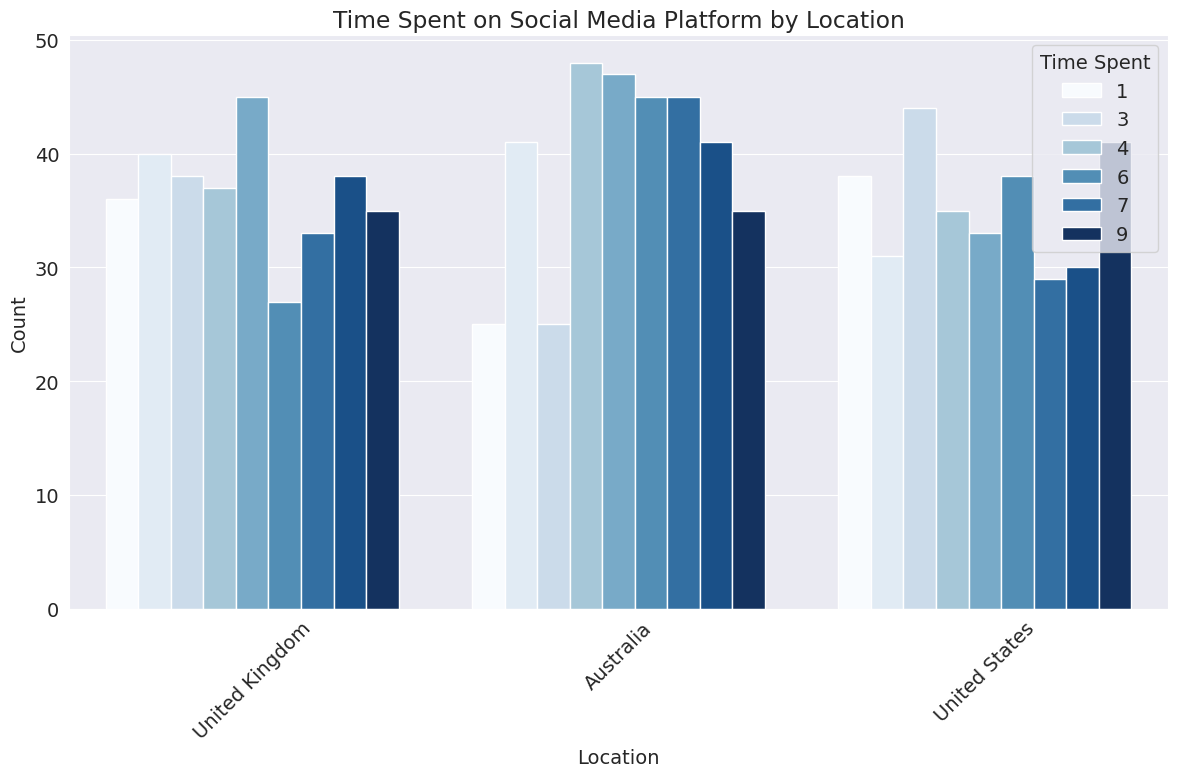

In [53]:


# Define the mapping for the time_spent values
time_spent_mapping = {
    'Low': '0-1 hours',
    'Medium': '1-2 hours',
    'High': '2+ hours'
}

# Apply the mapping
df['time_spent_label'] = df['time_spent'].map(time_spent_mapping)

# Plotting
plt.figure(figsize=(12, 8))
sns.countplot(data=df, x='location', hue='time_spent',
               hue_order=['0-1 hours', '1-2 hours', '2+ hours'],
              palette='Blues')

plt.xlabel('Location')
plt.ylabel('Count')
plt.title('Time Spent on Social Media Platform by Location')
plt.legend(title='Time Spent')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## Find income of Different Genders

In [54]:
#Aggregation of income by gender
income=df.groupby(by=['gender']).agg({'income':'mean'}).reset_index()
income

,gender,income
0,female,15185.770393
1,male,14919.620178
2,non-binary,14941.027108


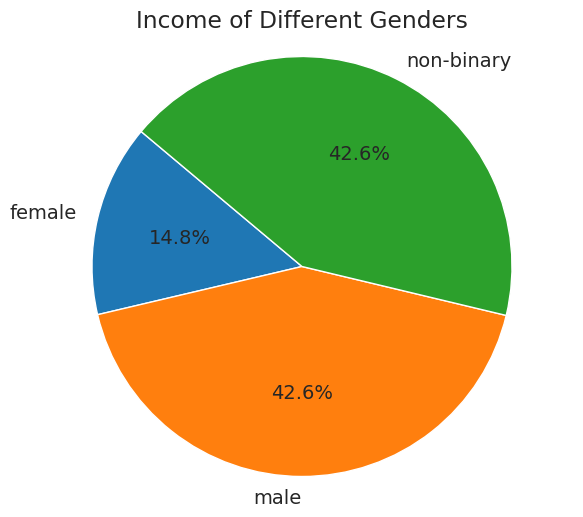

In [55]:
#Pie Chart for the  income of different genders
labels=['female','male','non-binary']
sizes=[5185.770393,14919.620178,14941.027108]
plt.figure(figsize=(7, 6))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140)
plt.title('Income of Different Genders')
plt.axis('equal')
plt.show()

## Time spent on SM by Home Owners and Car Owners

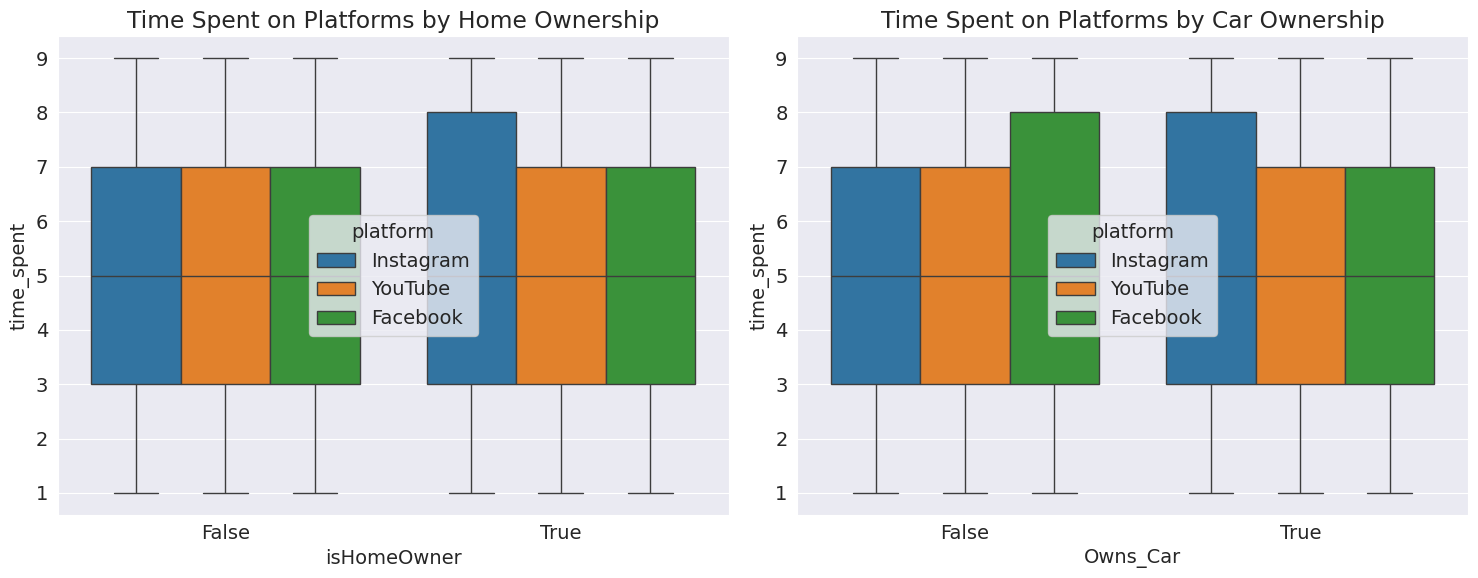

In [56]:
#Box Plot
plt.figure(figsize=(15, 6))

#  isHomeOwner
plt.subplot(1, 2, 1)
sns.boxplot(data=df, x='isHomeOwner', y='time_spent', hue='platform')
plt.title('Time Spent on Platforms by Home Ownership')

#  Owns_Car
plt.subplot(1, 2, 2)
sns.boxplot(data=df, x='Owns_Car', y='time_spent', hue='platform')
plt.title('Time Spent on Platforms by Car Ownership')

plt.tight_layout()
plt.show()

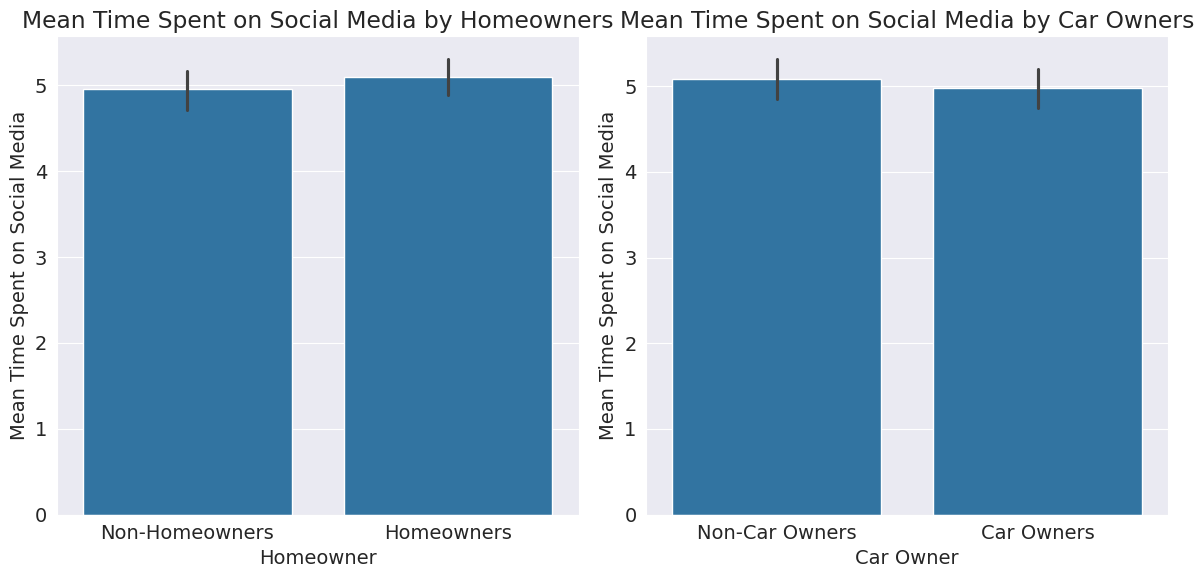

In [57]:

plt.figure(figsize=(12, 6))

# Bar Plot for Homeowners vs. Non-Homeowners
plt.subplot(1, 2, 1)
sns.barplot(data=df, x='isHomeOwner', y='time_spent')
plt.xlabel('Homeowner')
plt.ylabel('Mean Time Spent on Social Media')
plt.title('Mean Time Spent on Social Media by Homeowners')
plt.xticks(ticks=[0, 1], labels=['Non-Homeowners', 'Homeowners'])

# Bar Plot for Car Owners vs. Non-Car Owners
plt.subplot(1, 2, 2)
sns.barplot(data=df, x='Owns_Car', y='time_spent')
plt.xlabel('Car Owner')
plt.ylabel('Mean Time Spent on Social Media')
plt.title('Mean Time Spent on Social Media by Car Owners')
plt.xticks(ticks=[0, 1], labels=['Non-Car Owners', 'Car Owners'])

plt.tight_layout()
plt.show()

In [58]:
correlation_homeowner = df['time_spent'].corr(df['isHomeOwner'])
correlation_car_owner = df['time_spent'].corr(df['Owns_Car'])
correlation_age = df['time_spent'].corr(df['age'])
correlation_indebt= df['time_spent'].corr(df['indebt'])
correlation_income= df['time_spent'].corr(df['income'])


print(f"Correlation between time spent and home ownership: {correlation_homeowner}")
print(f"Correlation between time spent and car ownership: {correlation_car_owner}")
print(f"Correlation between time spent and car ownership: {correlation_age}")
print(f"Correlation between time spent and car ownership: {correlation_indebt}")
print(f"Correlation between time spent and car ownership: {correlation_income}")

Correlation between time spent and home ownership: 0.02938838934328529
Correlation between time spent and car ownership: -0.020270983067538655
Correlation between time spent and car ownership: -0.03382696091719532
Correlation between time spent and car ownership: 0.013078555006531068
Correlation between time spent and car ownership: 0.004757251539943767


In [59]:
import matplotlib.pyplot as plt

In [60]:
count = df['age'].value_counts()

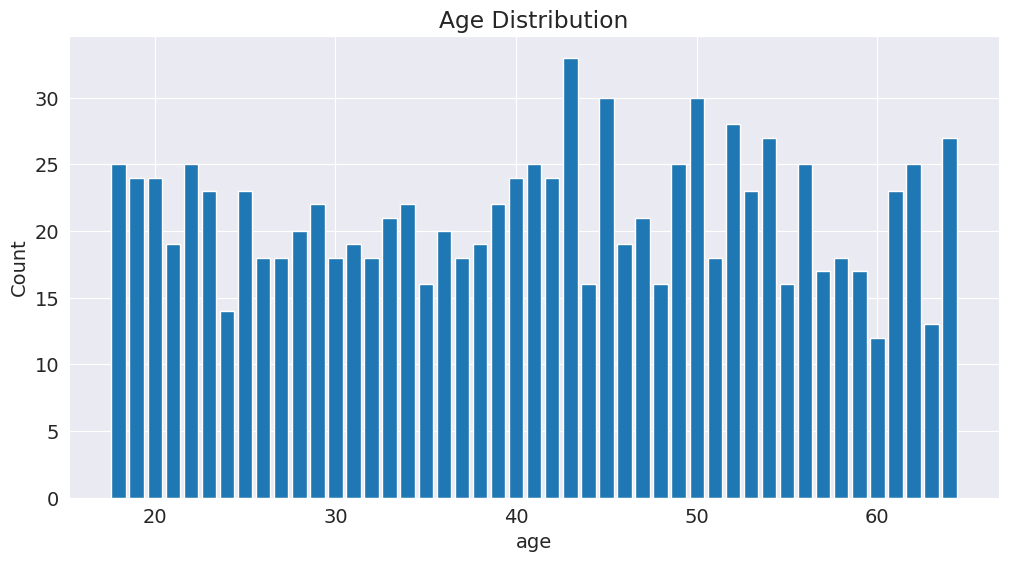

In [61]:
plt.figure(figsize=(12,6))
plt.title('Age Distribution')
plt.xlabel('age')
plt.ylabel('Count')
plt.bar(df['age'].value_counts().index, df['age'].value_counts().values)
plt.show()
plt.show()

In [62]:
df.columns

Index(['age', 'gender', 'time_spent', 'platform', 'interests', 'location',
       'demographics', 'profession', 'income', 'indebt', 'isHomeOwner',
       'Owns_Car', 'Age Category', 'time_spent_label'],
      dtype='object')

In [63]:
df['gender'].value_counts()

gender
male          337
non-binary    332
female        331
Name: count, dtype: int64

histograms to visualize the distribution of a dataset.
Countplot--Show the counts of observations in each categorical bin using bars.

<Axes: xlabel='age', ylabel='Count'>

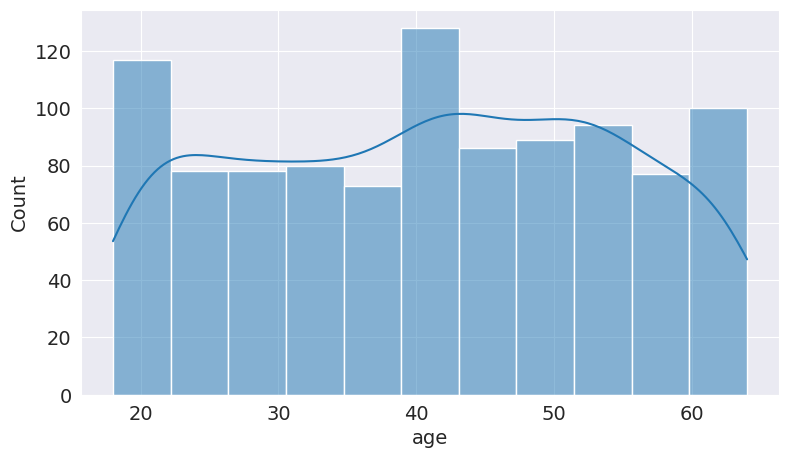

In [64]:
import seaborn as sns
sns.histplot(df["age"],kde=True)

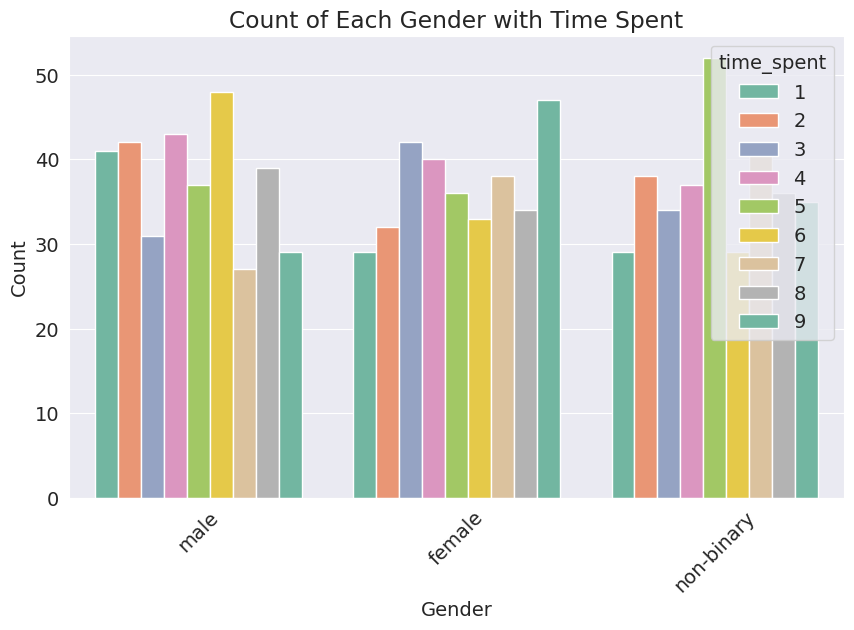

In [65]:
#sns.countplot(x=df["gender"])
import seaborn as sns
import matplotlib.pyplot as plt

# Plot the count of each gender, colored by time_spent
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='gender', hue='time_spent', palette='Set2')

# Add titles and labels
plt.title('Count of Each Gender with Time Spent')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability

# Show the plot
plt.show()

<Axes: xlabel='time_spent', ylabel='Count'>

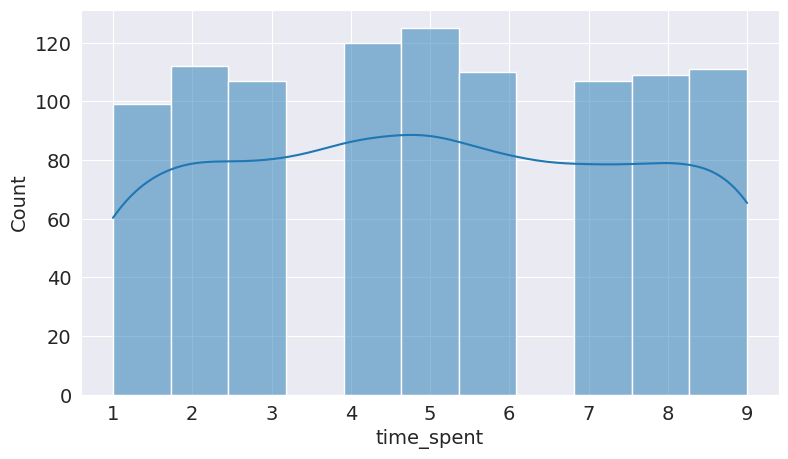

In [66]:
sns.histplot(df["time_spent"],kde=True)

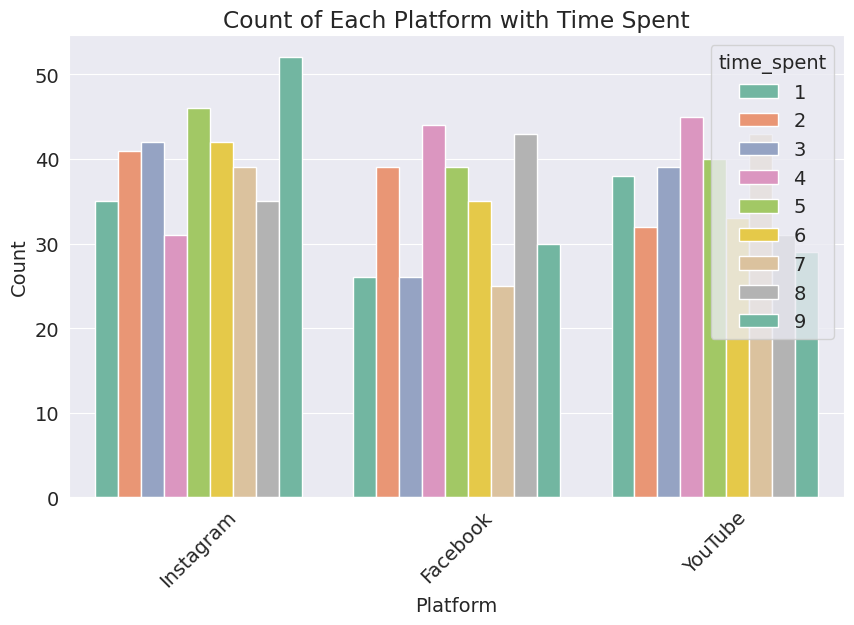

In [67]:
#sns.countplot(x=df["platform"])
import seaborn as sns
import matplotlib.pyplot as plt

# Plot the count of each platform, colored by time_spent
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='platform', hue='time_spent', palette='Set2')

# Add titles and labels
plt.title('Count of Each Platform with Time Spent')
plt.xlabel('Platform')
plt.ylabel('Count')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability

# Show the plot
plt.show()

<Axes: xlabel='interests', ylabel='count'>

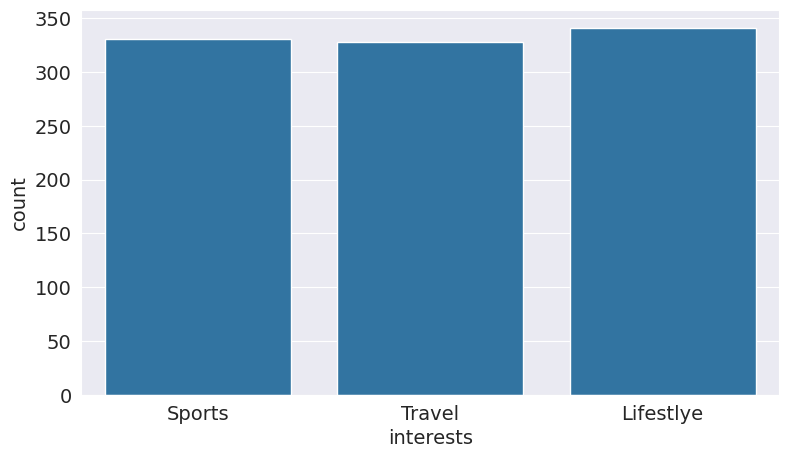

In [68]:
sns.countplot(x=df["interests"])

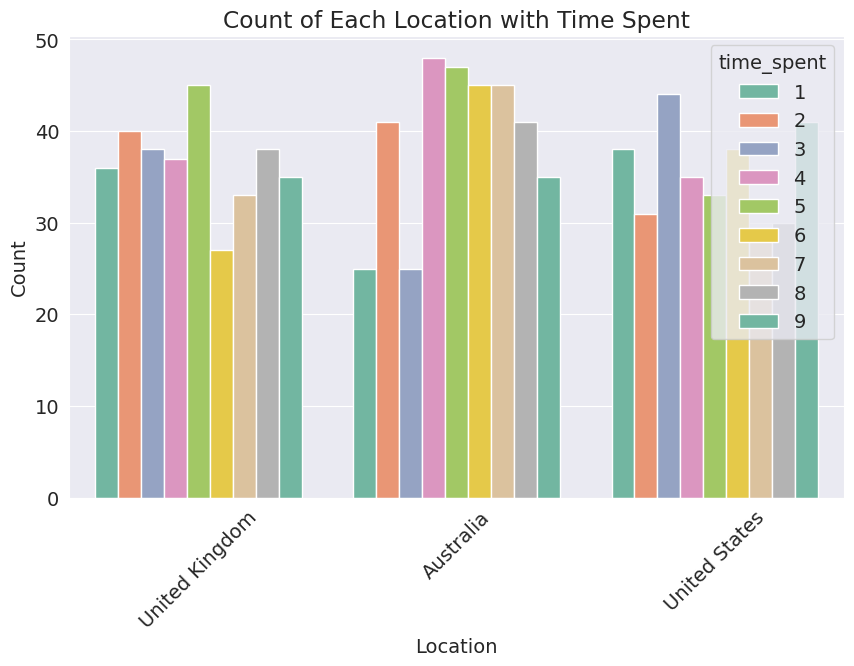

In [69]:
#sns.countplot(x=df["location"])
import seaborn as sns
import matplotlib.pyplot as plt

# Plot the count of each location, colored by time_spent
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='location', hue='time_spent', palette='Set2')

# Add titles and labels
plt.title('Count of Each Location with Time Spent')
plt.xlabel('Location')
plt.ylabel('Count')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability

# Show the plot
plt.show()

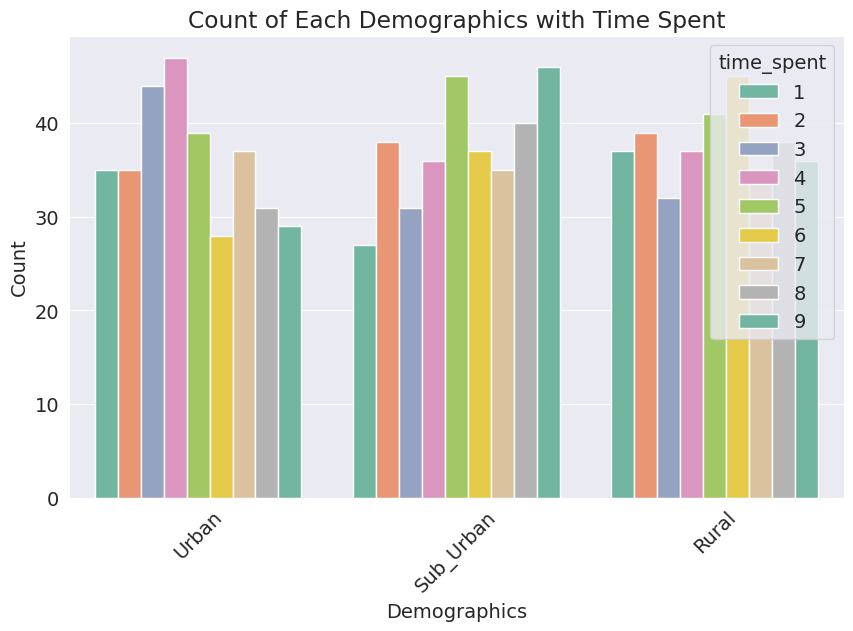

In [70]:
#sns.countplot(x=df["demographics"])
import seaborn as sns
import matplotlib.pyplot as plt

# Plot the count of each profession, colored by time_spent
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='demographics', hue='time_spent', palette='Set2')

# Add titles and labels
plt.title('Count of Each Demographics with Time Spent')
plt.xlabel('Demographics')
plt.ylabel('Count')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability

# Show the plot
plt.show()

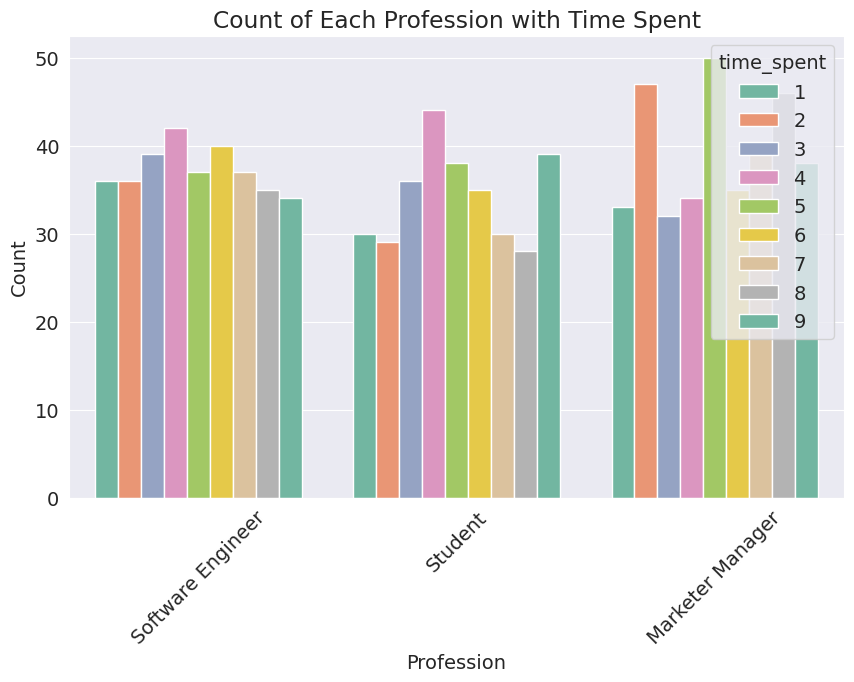

In [71]:

import seaborn as sns
import matplotlib.pyplot as plt

# Plot the count of each profession, colored by time_spent
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='profession', hue='time_spent', palette='Set2')

# Add titles and labels
plt.title('Count of Each Profession with Time Spent')
plt.xlabel('Profession')
plt.ylabel('Count')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability

# Show the plot
plt.show()

<Axes: xlabel='income', ylabel='Count'>

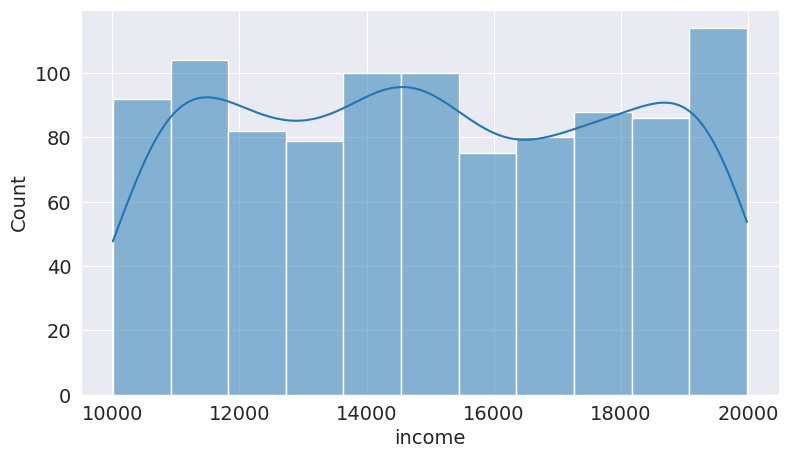

In [72]:
sns.histplot(df["income"],kde=True)

<Axes: xlabel='indebt', ylabel='count'>

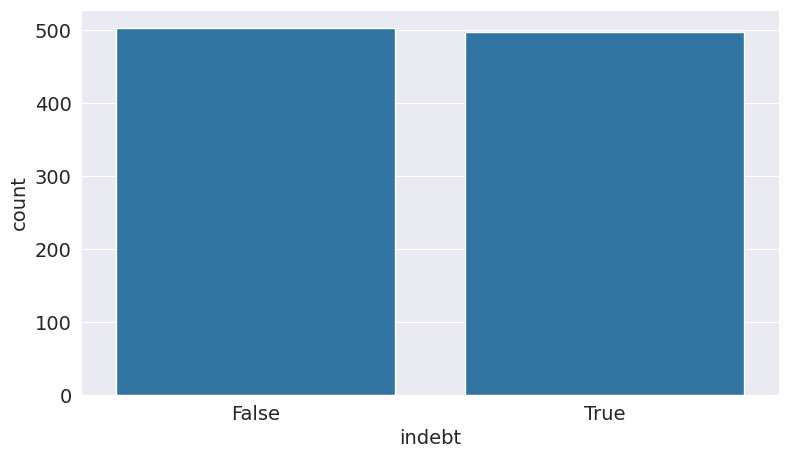

In [73]:
sns.countplot(x=df["indebt"])

<Axes: xlabel='Owns_Car', ylabel='count'>

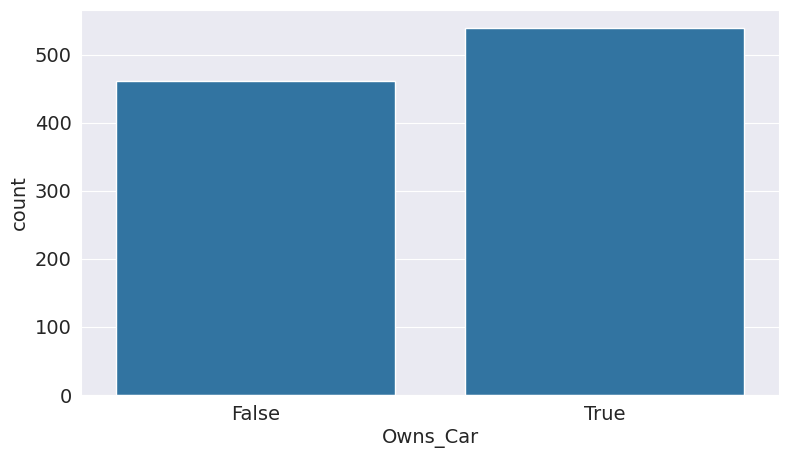

In [74]:
sns.countplot(x=df["Owns_Car"])

<Axes: xlabel='isHomeOwner', ylabel='count'>

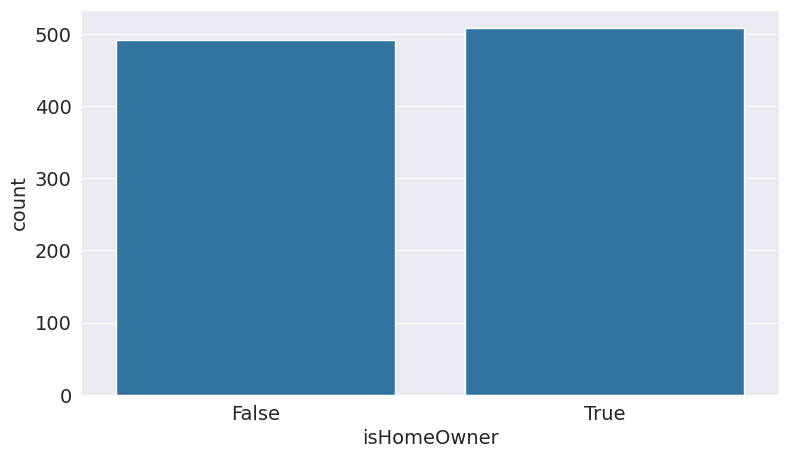

In [76]:
sns.countplot(x=df["isHomeOwner"])

In [75]:
df.columns

Index(['age', 'gender', 'time_spent', 'platform', 'interests', 'location',
       'demographics', 'profession', 'income', 'indebt', 'isHomeOwner',
       'Owns_Car', 'Age Category', 'time_spent_label'],
      dtype='object')

In [77]:
#Outlier Detection

def detect_outliers(column):
    # Check if the column contains numerical values (integers or floats)
    if column.dtype in ['int64', 'float64']:
        # Compute the first and third quartiles
        Q1 = column.quantile(0.25)
        Q3 = column.quantile(0.75)

        # Calculate the interquartile range (IQR)
        IQR = Q3 - Q1

        # Define the lower and upper bounds for outliers
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        # Detect outliers based on the bounds
        outliers = column[(column < lower_bound) | (column > upper_bound)]
        return outliers
    else:
        # Return an empty Series if the column does not contain numerical values
        return pd.Series([])

In [78]:
import pandas as pd

# Initialize an empty DataFrame to store outliers
outliers_df = pd.DataFrame()

# Iterate over each column in the DataFrame
for column in df.columns:
    # Apply detect_outliers() function to the column
    outliers = detect_outliers(df[column])

    # Store outliers for the current column in the DataFrame
    outliers_df[column] = outliers

# Print the DataFrame containing outliers for each column
print("DataFrame containing outliers for each column:")
print(outliers_df)

DataFrame containing outliers for each column:
Empty DataFrame
Columns: [age, gender, time_spent, platform, interests, location, demographics, profession, income, indebt, isHomeOwner, Owns_Car, Age Category, time_spent_label]
Index: []


In [79]:
# Changing data types

for feature in df.columns: # Loop through all columns in the dataframe
    if df[feature].dtype == 'object': # Only apply for columns with categorical strings
        df[feature] = pd.Categorical(df[feature])# Replace strings with an integer
df.head(10)

,age,gender,time_spent,platform,interests,location,demographics,profession,income,indebt,isHomeOwner,Owns_Car,Age Category,time_spent_label
0,56,male,3,Instagram,Sports,United Kingdom,Urban,Software Engineer,19774,True,False,False,aged,NaN
1,46,female,2,Facebook,Travel,United Kingdom,Urban,Student,10564,True,True,True,middel aged Adults,NaN
2,32,male,8,Instagram,Sports,Australia,Sub_Urban,Marketer Manager,13258,False,False,False,middel aged Adults,NaN
3,60,non-binary,5,Instagram,Travel,United Kingdom,Urban,Student,12500,False,True,False,aged,NaN
4,25,male,1,Instagram,Lifestlye,Australia,Urban,Software Engineer,14566,False,True,True,Young Adults,NaN
5,38,male,3,Facebook,Travel,United States,Urban,Marketer Manager,19179,True,True,True,middel aged Adults,NaN
6,56,male,8,YouTube,Sports,United States,Urban,Student,16881,True,True,True,aged,NaN
7,36,male,4,Instagram,Sports,Australia,Urban,Marketer Manager,13636,True,False,True,middel aged Adults,NaN
8,40,non-binary,7,YouTube,Lifestlye,Australia,Sub_Urban,Marketer Manager,16030,False,False,True,middel aged Adults,NaN
9,28,non-binary,2,Instagram,Sports,Australia,Sub_Urban,Marketer Manager,10223,True,False,True,Young Adults,NaN


In [80]:
# Print the count of each unique value in the 'age' column
print(df.age.value_counts())

# Print the count of each unique value in the 'gender' column
print(df.gender.value_counts())

# Print the count of each unique value in the 'time_spent' column
print(df.time_spent.value_counts())

# Print the count of each unique value in the 'platform' column
print(df.platform.value_counts())

# Print the count of each unique value in the 'interests' column
print(df.interests.value_counts())

# Print the count of each unique value in the 'location' column
print(df.location.value_counts())

# Print the count of each unique value in the 'demographics' column
print(df.demographics.value_counts())

# Print the count of each unique value in the 'profession' column
print(df.profession.value_counts())

# Print the count of each unique value in the 'income' column
print(df.income.value_counts())

# Print the count of each unique value in the 'indebt' column
print(df.indebt.value_counts())
# Print the count of each unique value in the 'owns_car' column
print(df.Owns_Car.value_counts())
# Print the count of each unique value in the 'ishomeowner' column
print(df.isHomeOwner.value_counts())



age
43    33
45    30
50    30
52    28
54    27
64    27
49    25
22    25
18    25
62    25
56    25
41    25
42    24
20    24
40    24
19    24
61    23
25    23
23    23
53    23
29    22
34    22
39    22
47    21
33    21
36    20
28    20
46    19
38    19
21    19
31    19
51    18
27    18
58    18
37    18
26    18
30    18
32    18
59    17
57    17
35    16
48    16
44    16
55    16
24    14
63    13
60    12
Name: count, dtype: int64
gender
male          337
non-binary    332
female        331
Name: count, dtype: int64
time_spent
5    125
4    120
2    112
9    111
6    110
8    109
3    107
7    107
1     99
Name: count, dtype: int64
platform
Instagram    363
YouTube      330
Facebook     307
Name: count, dtype: int64
interests
Lifestlye    341
Sports       331
Travel       328
Name: count, dtype: int64
location
Australia         352
United Kingdom    329
United States     319
Name: count, dtype: int64
demographics
Rural        340
Sub_Urban    335
Urban        325
Name

ONE HOT ENCODING

In [81]:
# Select categorical columns
categorical_cols = ['gender', 'platform', 'interests', 'location', 'demographics', 'profession']

# Apply one-hot encoding
df_encoded = pd.get_dummies(df, columns=categorical_cols)

# Display the first few rows of the encoded DataFrame
print(df_encoded.head())

   age  time_spent  income  indebt  isHomeOwner  Owns_Car        Age Category  \
0   56           3   19774    True        False     False                aged   
1   46           2   10564    True         True      True  middel aged Adults   
2   32           8   13258   False        False     False  middel aged Adults   
3   60           5   12500   False         True     False                aged   
4   25           1   14566   False         True      True        Young Adults   

  time_spent_label  gender_female  gender_male  ...  interests_Travel  \
0              NaN          False         True  ...             False   
1              NaN           True        False  ...              True   
2              NaN          False         True  ...             False   
3              NaN          False        False  ...              True   
4              NaN          False         True  ...             False   

   location_Australia  location_United Kingdom  location_United States  \


categorical_cols contains the names of the categorical columns in your dataset. pd.get_dummies() function is used to perform one-hot encoding on the specified categorical columns. The resulting DataFrame df_encoded contains the original numerical columns along with the newly created binary columns for each category within the categorical columns. After applying one-hot encoding, you'll have a new DataFrame (df_encoded) with all categorical variables encoded into numerical format.

These visualizations plot pairwise relationships in a dataset so that each variable in a dataset will be plotted against each other variable in the dataset.

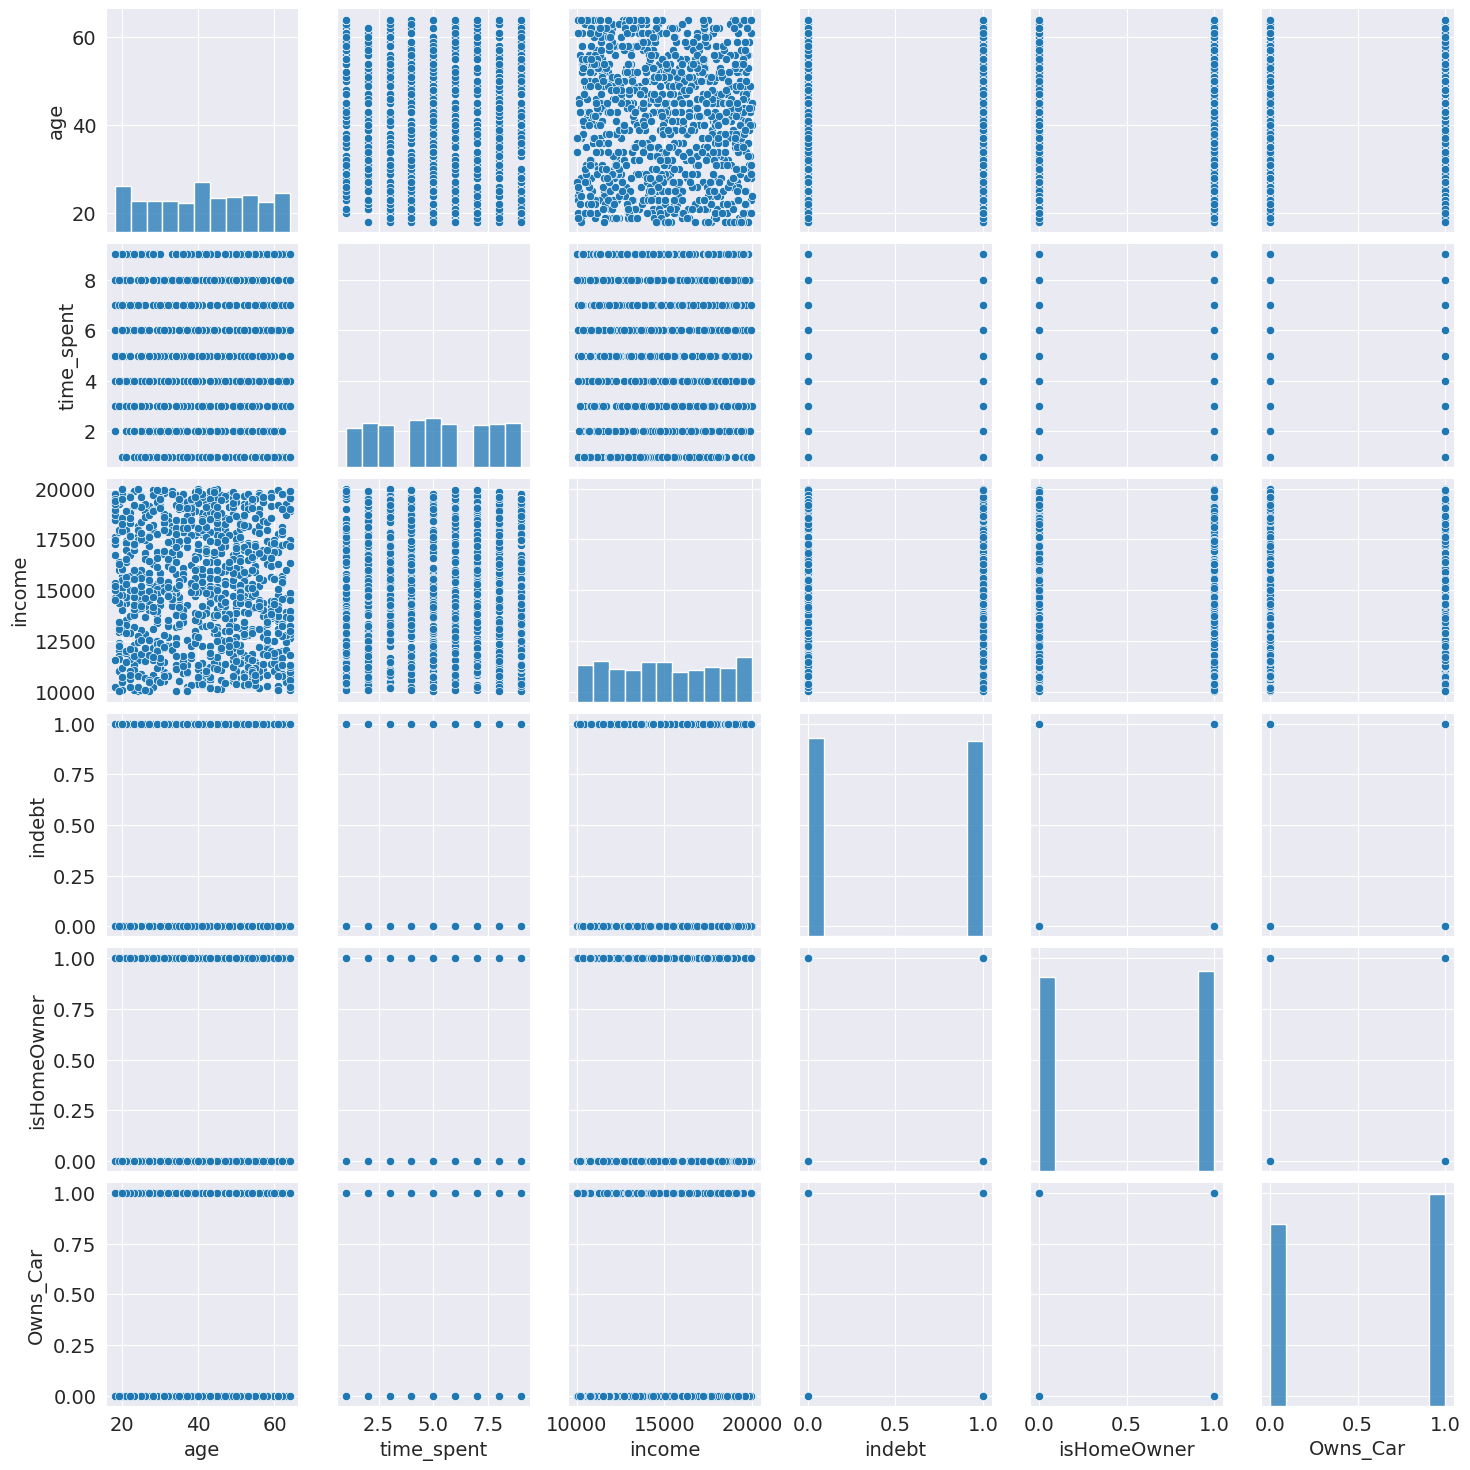

In [82]:
sns.pairplot(data=df)

Things to Note:
Large Datasets: If your dataset is very large, the pairplot might become cluttered or slow to render. You might consider using a subset of the data or a different visualization method.
Numerical Data: Ensure the columns you want to plot are numerical. Categorical data will not be effectively visualized in a pairplot unless you use hue to color the points.



A pairs plot is a matrix of scatterplots that lets you understand the pairwise relationship between different variables in a dataset.

The easiest way to create a pairs plot in Python is to use the seaborn.pairplot(df) function.



In [83]:
# Create interaction features
df_encoded['age_income_interaction'] = df_encoded['age'] * df_encoded['income']
df_encoded['age_time_spent_interaction'] = df_encoded['age'] * df_encoded['time_spent']
df_encoded['income_time_spent_interaction'] = df_encoded['income'] * df_encoded['time_spent']

# Display the first few rows of the DataFrame to verify the new features
print(df_encoded.head())


   age  time_spent  income  indebt  isHomeOwner  Owns_Car        Age Category  \
0   56           3   19774    True        False     False                aged   
1   46           2   10564    True         True      True  middel aged Adults   
2   32           8   13258   False        False     False  middel aged Adults   
3   60           5   12500   False         True     False                aged   
4   25           1   14566   False         True      True        Young Adults   

  time_spent_label  gender_female  gender_male  ...  location_United States  \
0              NaN          False         True  ...                   False   
1              NaN           True        False  ...                   False   
2              NaN          False         True  ...                   False   
3              NaN          False        False  ...                   False   
4              NaN          False         True  ...                   False   

   demographics_Rural  demographics_Su

In [84]:
df

,age,gender,time_spent,platform,interests,location,demographics,profession,income,indebt,isHomeOwner,Owns_Car,Age Category,time_spent_label
0,56,male,3,Instagram,Sports,United Kingdom,Urban,Software Engineer,19774,True,False,False,aged,NaN
1,46,female,2,Facebook,Travel,United Kingdom,Urban,Student,10564,True,True,True,middel aged Adults,NaN
2,32,male,8,Instagram,Sports,Australia,Sub_Urban,Marketer Manager,13258,False,False,False,middel aged Adults,NaN
3,60,non-binary,5,Instagram,Travel,United Kingdom,Urban,Student,12500,False,True,False,aged,NaN
4,25,male,1,Instagram,Lifestlye,Australia,Urban,Software Engineer,14566,False,True,True,Young Adults,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,22,female,8,Instagram,Lifestlye,United Kingdom,Rural,Marketer Manager,18536,False,True,False,Young Adults,NaN
996,40,non-binary,6,YouTube,Travel,United Kingdom,Rural,Software Engineer,12711,True,False,False,middel aged Adults,NaN
997,27,non-binary,5,YouTube,Travel,United Kingdom,Rural,Student,17595,True,False,True,Young Adults,NaN
998,61,female,4,YouTube,Sports,Australia,Sub_Urban,Marketer Manager,16273,True,True,False,aged,NaN


<Axes: xlabel='count', ylabel='profession'>

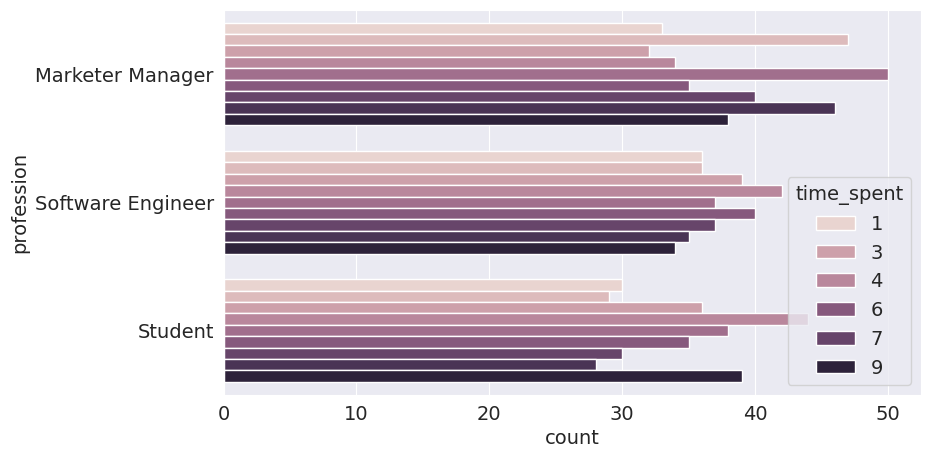

In [85]:
sns.countplot(y='profession', data=df, hue = "time_spent")

<Axes: xlabel='demographics', ylabel='count'>

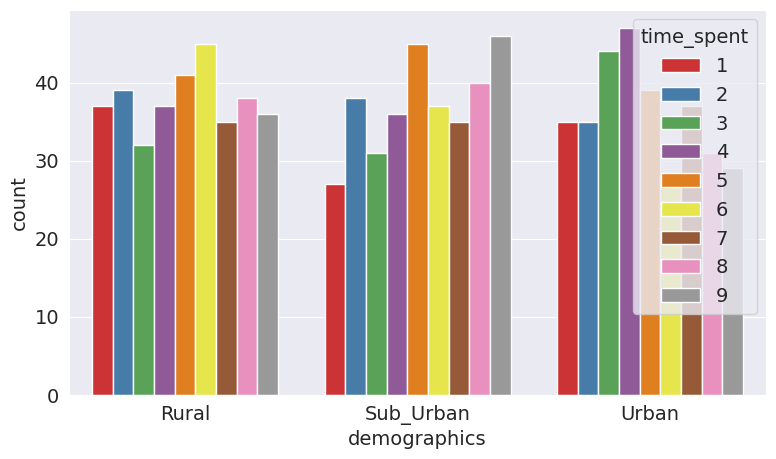

In [86]:
sns.countplot(x='demographics', data= df, hue = "time_spent", palette =  "Set1")

<Axes: xlabel='count', ylabel='time_spent'>

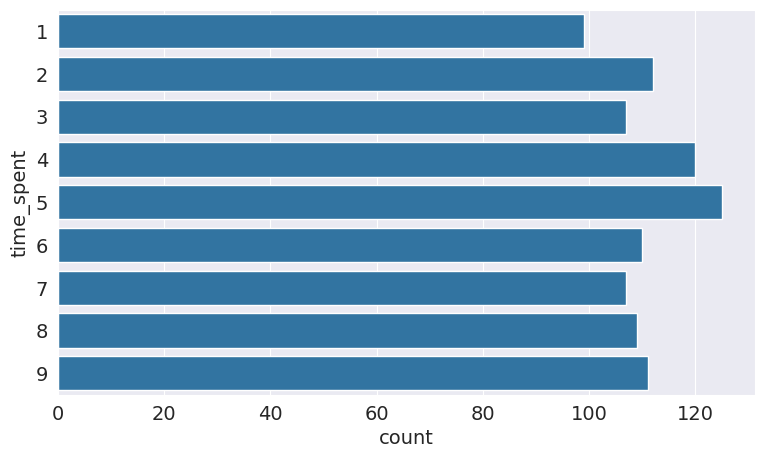

In [87]:
sns.countplot(y='time_spent', data= df)

In [88]:
df

,age,gender,time_spent,platform,interests,location,demographics,profession,income,indebt,isHomeOwner,Owns_Car,Age Category,time_spent_label
0,56,male,3,Instagram,Sports,United Kingdom,Urban,Software Engineer,19774,True,False,False,aged,NaN
1,46,female,2,Facebook,Travel,United Kingdom,Urban,Student,10564,True,True,True,middel aged Adults,NaN
2,32,male,8,Instagram,Sports,Australia,Sub_Urban,Marketer Manager,13258,False,False,False,middel aged Adults,NaN
3,60,non-binary,5,Instagram,Travel,United Kingdom,Urban,Student,12500,False,True,False,aged,NaN
4,25,male,1,Instagram,Lifestlye,Australia,Urban,Software Engineer,14566,False,True,True,Young Adults,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,22,female,8,Instagram,Lifestlye,United Kingdom,Rural,Marketer Manager,18536,False,True,False,Young Adults,NaN
996,40,non-binary,6,YouTube,Travel,United Kingdom,Rural,Software Engineer,12711,True,False,False,middel aged Adults,NaN
997,27,non-binary,5,YouTube,Travel,United Kingdom,Rural,Student,17595,True,False,True,Young Adults,NaN
998,61,female,4,YouTube,Sports,Australia,Sub_Urban,Marketer Manager,16273,True,True,False,aged,NaN


<Axes: xlabel='count', ylabel='gender'>

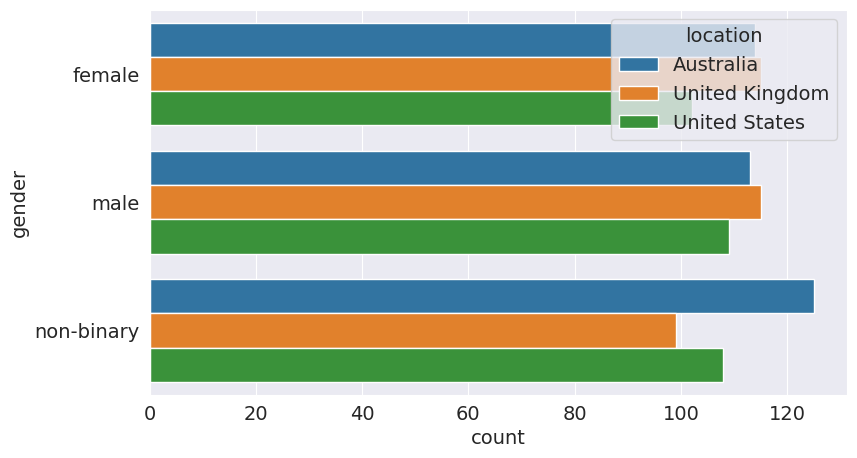

In [89]:
sns.countplot(y='gender', data= df, hue = "location")

<Axes: xlabel='count', ylabel='profession'>

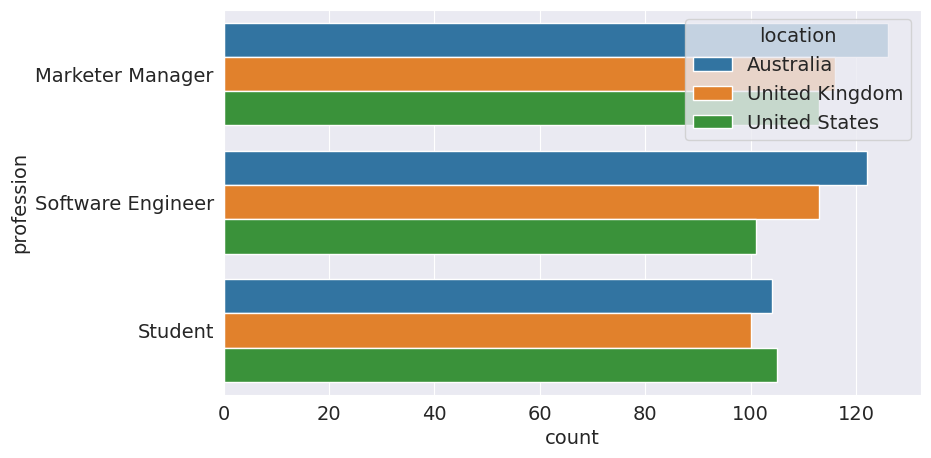

In [90]:
sns.countplot(y='profession', data= df, hue = "location")

<Axes: xlabel='count', ylabel='profession'>

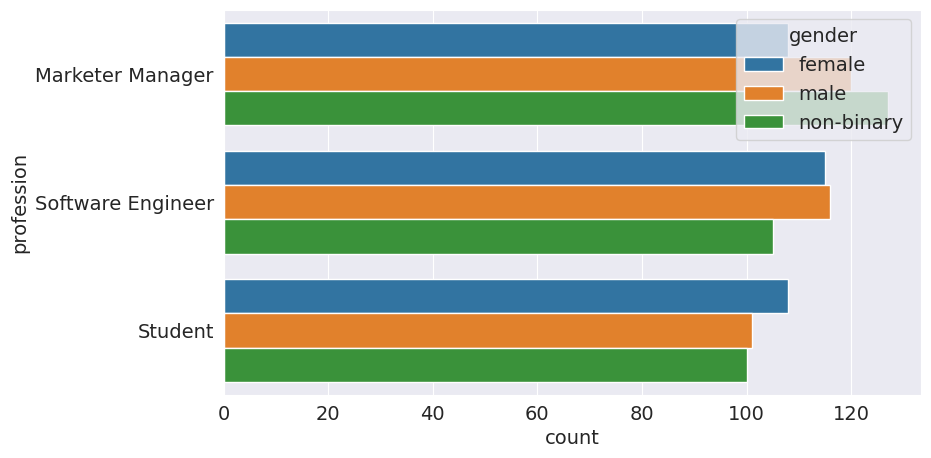

In [91]:
sns.countplot(y='profession', data= df, hue = "gender")

<Axes: xlabel='count', ylabel='profession'>

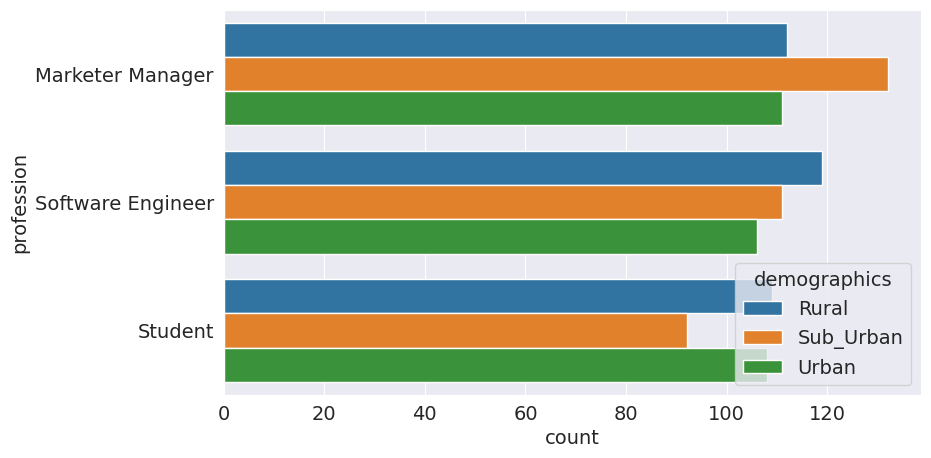

In [92]:
sns.countplot(y='profession', data= df, hue = "demographics")

In [93]:
df

,age,gender,time_spent,platform,interests,location,demographics,profession,income,indebt,isHomeOwner,Owns_Car,Age Category,time_spent_label
0,56,male,3,Instagram,Sports,United Kingdom,Urban,Software Engineer,19774,True,False,False,aged,NaN
1,46,female,2,Facebook,Travel,United Kingdom,Urban,Student,10564,True,True,True,middel aged Adults,NaN
2,32,male,8,Instagram,Sports,Australia,Sub_Urban,Marketer Manager,13258,False,False,False,middel aged Adults,NaN
3,60,non-binary,5,Instagram,Travel,United Kingdom,Urban,Student,12500,False,True,False,aged,NaN
4,25,male,1,Instagram,Lifestlye,Australia,Urban,Software Engineer,14566,False,True,True,Young Adults,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,22,female,8,Instagram,Lifestlye,United Kingdom,Rural,Marketer Manager,18536,False,True,False,Young Adults,NaN
996,40,non-binary,6,YouTube,Travel,United Kingdom,Rural,Software Engineer,12711,True,False,False,middel aged Adults,NaN
997,27,non-binary,5,YouTube,Travel,United Kingdom,Rural,Student,17595,True,False,True,Young Adults,NaN
998,61,female,4,YouTube,Sports,Australia,Sub_Urban,Marketer Manager,16273,True,True,False,aged,NaN


<ipython-input-94-da31707b147d>:61: UserWarning: Tight layout not applied. tight_layout cannot make axes height small enough to accommodate all axes decorations.
  plt.tight_layout() # Added to prevent overlapping of subplots


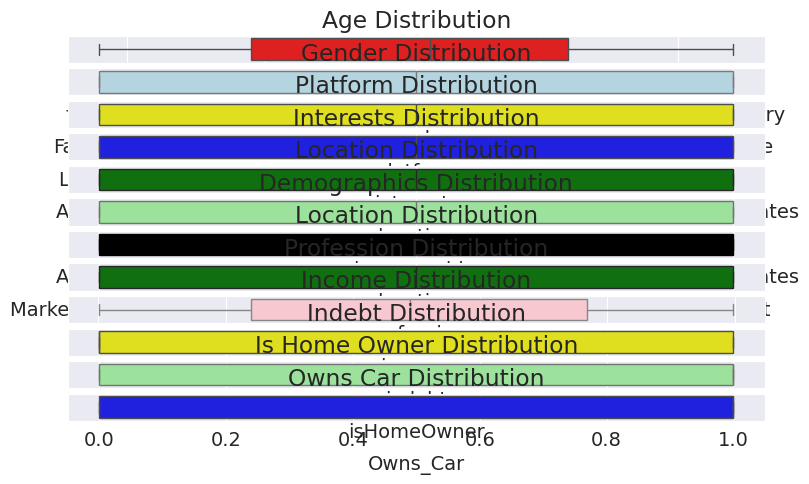

In [94]:
# Subplot 1: Age Distribution
plt.subplot(12, 1, 1) # Changed the number of rows to 12 to fit all subplots
sns.boxplot(x=df.age, color='red')
plt.title('Age Distribution')  # Add title to subplot 1

# Subplot 2: Gender Distribution
plt.subplot(12, 1, 2) # Changed the number of rows to 12 to fit all subplots
sns.boxplot(x=df.gender, color='lightblue')
plt.title('Gender Distribution')  # Add title to subplot 2

# Subplot 3: platform Distribution
plt.subplot(12, 1, 3) # Changed the number of rows to 12 to fit all subplots
sns.boxplot(x=df.platform, color='yellow')
plt.title('Platform Distribution')  # Add title to subplot 3

# Subplot 4: Campaign Distribution
plt.subplot(12, 1, 4) # Changed the number of rows to 12 to fit all subplots
sns.boxplot(x=df.interests, color='blue')
plt.title('Interests Distribution')  # Add title to subplot 4

# Subplot 5:Location Distribution
plt.subplot(12, 1, 5) # Changed the number of rows to 12 to fit all subplots
sns.boxplot(x=df.location, color='green')
plt.title('Location Distribution')  # Add title to subplot 5

# Subplot 6:Demographics Distribution
plt.subplot(12, 1, 6) # Changed the number of rows to 12 to fit all subplots
sns.boxplot(x=df.demographics, color='lightgreen')
plt.title('Demographics Distribution')  # Add title to subplot 6

# Subplot 7:Location Distribution
plt.subplot(12, 1, 7) # Changed the number of rows to 12 to fit all subplots
sns.boxplot(x=df.location, color='black')
plt.title('Location Distribution')  # Add title to subplot 7

# Subplot 8:Profession Distribution
plt.subplot(12, 1, 8) # Changed the number of rows to 12 to fit all subplots
sns.boxplot(x=df.profession, color='green')
plt.title('Profession Distribution')  # Add title to subplot 8

# Subplot 9:income Distribution
plt.subplot(12, 1, 9) # Changed the number of rows to 12 to fit all subplots
sns.boxplot(x=df.income, color='pink')
plt.title('Income Distribution')  # Add title to subplot 9

# Subplot 10:indebt Distribution
plt.subplot(12, 1, 10) # Changed the number of rows to 12 to fit all subplots
sns.boxplot(x=df.indebt, color='yellow')
plt.title('Indebt Distribution')  # Add title to subplot 10

# Subplot 11:Is Home Owner Distribution
plt.subplot(12, 1, 11) # Changed the number of rows to 12 to fit all subplots
sns.boxplot(x=df.isHomeOwner, color='lightgreen')
plt.title('Is Home Owner Distribution')  # Add title to subplot 11

# Subplot 12:Owns Car Distribution
plt.subplot(12, 1, 12) # Changed the number of rows to 12 to fit all subplots
sns.boxplot(x=df.Owns_Car, color='blue')
plt.title('Owns Car Distribution')  # Add title to subplot 12

plt.tight_layout() # Added to prevent overlapping of subplots
plt.show()